In [52]:
# Technical Indicators
import tablib as ta

# Plotting graphs
import matplotlib.pyplot as plt

import numpy as np

from pandas_profiling import ProfileReport

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [53]:
stock_symbol = 'UBER'

In [54]:
df = pdr.get_data_yahoo(stock_symbol, '2000-01-01', '2022-11-9')
df = df.dropna()
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2022-11-02,29.570000,30.160000,28.629999,28.809999,28.809999,37083500
2022-11-03,28.030001,29.520000,27.709999,28.730000,28.730000,28033200
2022-11-04,29.440001,29.725000,28.040001,28.389999,28.389999,22292400


In [55]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()


In [56]:
df


,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,Open-Close,Open-Open
Date,,,,,,,,,,
2019-06-06,45.000000,45.750000,44.279999,44.919998,44.919998,16403700,41.700000,0.503891,0.000000,2.130001
2019-06-07,44.919998,45.669998,44.130001,44.160000,44.160000,12654700,42.068999,0.567517,0.000000,-0.080002
2019-06-10,44.020000,44.590000,42.529999,42.610001,42.610001,11618700,42.179000,0.495415,-0.139999,-0.899998
2019-06-11,43.220001,43.650002,41.799999,42.450001,42.450001,9095000,42.329000,0.431182,0.610001,-0.799999
2019-06-12,42.520000,42.650002,41.709999,42.169998,42.169998,5965300,42.552000,0.328851,0.070000,-0.700001
...,...,...,...,...,...,...,...,...,...,...
2022-11-02,29.570000,30.160000,28.629999,28.809999,28.809999,37083500,28.055000,0.248417,-0.180000,-0.500000
2022-11-03,28.030001,29.520000,27.709999,28.730000,28.730000,28033200,28.141000,0.312576,-0.779999,-1.539999
2022-11-04,29.440001,29.725000,28.040001,28.389999,28.389999,22292400,28.178000,0.340572,0.710001,1.410000


In [57]:
profile = ProfileReport(df)


In [58]:
profile.to_file(output_file='./output.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 33.58it/s]


In [59]:
print(df.columns)
print(df.shape[0])


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'S_10', 'Corr',
       'Open-Close', 'Open-Open'],
      dtype='object')
865


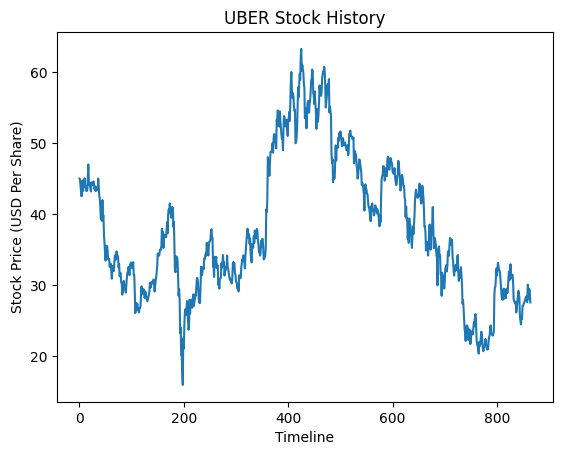

In [60]:
x = np.arange(0, df.shape[0])

plt.title(f'{stock_symbol} Stock History')
plt.xlabel('Timeline')
plt.ylabel('Stock Price (USD Per Share)')

plt.plot(x, df['Open'])
plt.show()
